# **Visual Information Processing Lab**

### MNIST vs MLP
#### Modified National Institute of Standards and Technology

#### Mounting

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/My Drive/2021/MTech')
print(os.getcwd())

/content/drive/My Drive/2021/MTech


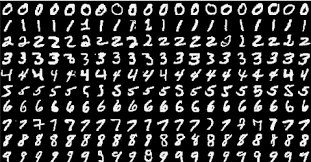

In [3]:
from IPython.display import Image, display
display(Image(filename='/content/drive/My Drive/2021/MTech/Files/mnist.png', embed=True))

#### Imports

In [4]:
import keras
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#### Data Fetching and Visualizattion

In [5]:
(xtrain,ytrain),(xtest,ytest)=mnist.load_data()
xtest1 = np.copy(xtrain)
ytest1 = np.copy(ytest)

11493376/11490434 [==============================] - 0s 0us/step


In [6]:
print(ytest1[100])
print(xtest1[100])

6
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 

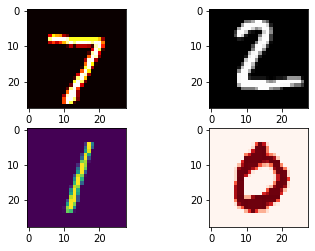

In [7]:
plt.subplot(221).imshow(xtest[0],cmap='hot')
plt.subplot(222).imshow(xtest[1],cmap='gray')
plt.subplot(223).imshow(xtest[2],cmap='viridis')
plt.subplot(224).imshow(xtest[3],cmap='Reds')

In [8]:
print(ytest[0])
print(ytest[1])
print(ytest[2])
print(ytest[3])

7
2
1
0


In [9]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [10]:
print(type(xtrain))
print(xtrain.ndim)
print(xtrain.dtype)

<class 'numpy.ndarray'>
3
uint8


In [11]:
print(xtrain.shape[0])
print(xtrain.shape[1])
print(xtrain.shape[2])
print(ytrain.shape[0])

60000
28
28
60000


#### Data Pre Processing
* Normalization
* One Hot Encoding

In [12]:
xtrain = xtrain.astype('float32')
xtest  = xtest.astype('float32')

In [13]:
#keras.utils.normalize(a, axis=-1, order=2)
print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

print (np.max(ytrain),np.max(ytest))
print (np.min(ytrain),np.min(ytest))

mean = np.mean(xtrain)
std  = np.std(xtrain)

print(mean)
print(std)

xtrain -= mean
xtrain /= std

xtest -= mean
xtest /= std

print (np.max(xtrain),np.max(xtest))
print (np.min(xtrain),np.min(xtest))

255.0 255.0
0.0 0.0
9 9
0 0
33.318447
78.567444
2.8215446 2.8215446
-0.42407447 -0.42407447


In [14]:
print(xtrain[0])

[[-0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447]
 [-0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447]
 [-0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447 -0.42407447
  -0.42407

In [16]:
xtrain = xtrain.reshape(xtrain.shape[0],784)
xtest  = xtest.reshape(xtest.shape[0],784)
print(xtrain.shape)
print(xtest.shape)

(60000, 784)
(10000, 784)


In [17]:
from keras.utils import to_categorical
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

print(ytrain.shape)
print(ytest.shape)

(60000, 10)
(10000, 10)


In [18]:
i=100
print(ytrain[i])
print(np.argmax(ytrain[i]))

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


#### MLP Model
* Model building
* Compiling
* Training

In [19]:
import keras
from keras import models
from keras import layers

In [20]:
model = models.Sequential()
model.add(layers.Dense(10,input_shape = (784,), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


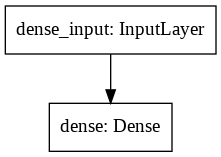

In [21]:
keras.utils.plot_model(model, to_file='model.png', show_shapes=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96)

In [22]:
import os
os.chdir('/content/drive/My Drive/2021/MTech/Weights/7/')
print(os.getcwd())
from keras.callbacks import ModelCheckpoint
mc = ModelCheckpoint('MLP_Mnist_MLP.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True)
filepath = "saved-model-{epoch:02d}.h5"
mc1 = ModelCheckpoint(filepath, monitor='val_loss', mode='min', verbose=1, save_best_only=True  ,period=10)
cv = keras.callbacks.CSVLogger('MLP_Mnist_MLP.csv', separator=',', append=False)

/content/drive/My Drive/2021/MTech/Weights/7


In [25]:
from keras.losses import categorical_crossentropy

model.compile(loss="categorical_crossentropy", optimizer="sgd", metrics=['accuracy'])

In [26]:
class WeightCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if epoch%1 == 0:
            fig, axs = plt.subplots(1,10, figsize=(10*1.5,1.5), facecolor='w', edgecolor='k')
            for i in range(10):
                axs[i].set_title("Digit : " + str(i))
                digit = model.layers[0].get_weights()[0][:,i]
                digit = ((digit - digit.min())*(1/(digit.max() - digit.min()))*255).astype("uint8")
                axs[i].imshow(digit.reshape(28,28),cmap="viridis")
weight = WeightCallback()

In [27]:
history=model.fit(xtrain, ytrain, validation_split=(0.2), batch_size=256, callbacks= [weight,mc,mc1,cv],epochs=20, verbose=1)
model.evaluate(xtest,ytest)

Output hidden; open in https://colab.research.google.com to view.

#### Performance Evaluation
* Loss and Accuracy Plots
* Evaluate
* Prediction
* Confusion Matrix

In [28]:
train_loss = history.history['loss']
train_acc = history.history['accuracy']
val_loss = history.history['val_loss']
val_acc = history.history['val_accuracy']
xc=range(len(train_loss))

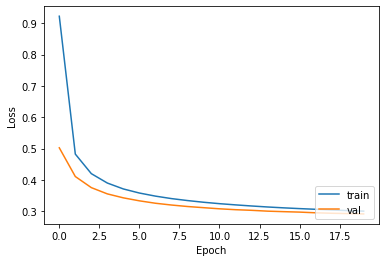

In [29]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_loss)
plt.plot(xc, val_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

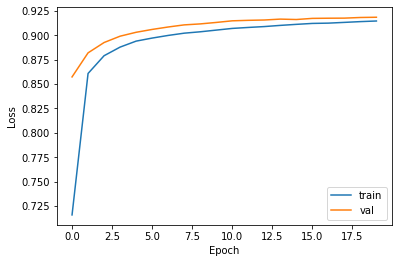

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(xc, train_acc)
plt.plot(xc, val_acc)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(['train','val'],loc=4)

In [31]:
os.chdir('/content/drive/My Drive/2021/MTech/Weights/7/')
model.load_weights('MLP_Mnist_MLP.h5')
model.evaluate(xtest,ytest)

313/313 [==============================] - 0s 1ms/step - loss: 0.2944 - accuracy: 0.9150


[0.29437199234962463, 0.9150000214576721]

In [32]:
i=120
print("Actual is",ytest[i])
pred=model.predict(xtest[i].reshape(1,784))
#print(pred)
print(pred.argmax())

Actual is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
5


In [33]:
import numpy as np
from sklearn.metrics import classification_report,confusion_matrix
import itertools

Y_pred = model.predict(xtest)
y_pred = np.argmax(Y_pred, axis=1)
target_names = ['class 0', 'class 1', 'class 2','class 3','class 4','class 5','class 6','class 7','class 8','class 9']
print(classification_report(np.argmax(ytest,axis=1), y_pred,target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.94      0.97      0.96       980
     class 1       0.95      0.98      0.96      1135
     class 2       0.93      0.89      0.90      1032
     class 3       0.91      0.89      0.90      1010
     class 4       0.91      0.93      0.92       982
     class 5       0.89      0.86      0.87       892
     class 6       0.92      0.95      0.94       958
     class 7       0.92      0.92      0.92      1028
     class 8       0.87      0.88      0.88       974
     class 9       0.89      0.89      0.89      1009

    accuracy                           0.92     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.92      0.91     10000



In [34]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
        

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[ 952    0    3    2    0   10    9    2    2    0]
 [   0 1107    2    2    0    2    4    2   16    0]
 [   8   11  914    8   16    6   13   12   37    7]
 [   4    2   25  897    0   35    3   12   20   12]
 [   1    6    6    0  912    1    9    3    7   37]
 [  10    3    6   34    8  764   21    8   30    8]
 [  11    3    4    2   14   10  909    2    3    0]
 [   2   15   22    7    8    0    0  941    2   31]
 [   8    9    5   24   10   25   15   11  855   12]
 [  12    6    1   11   37    8    1   26    8  899]]


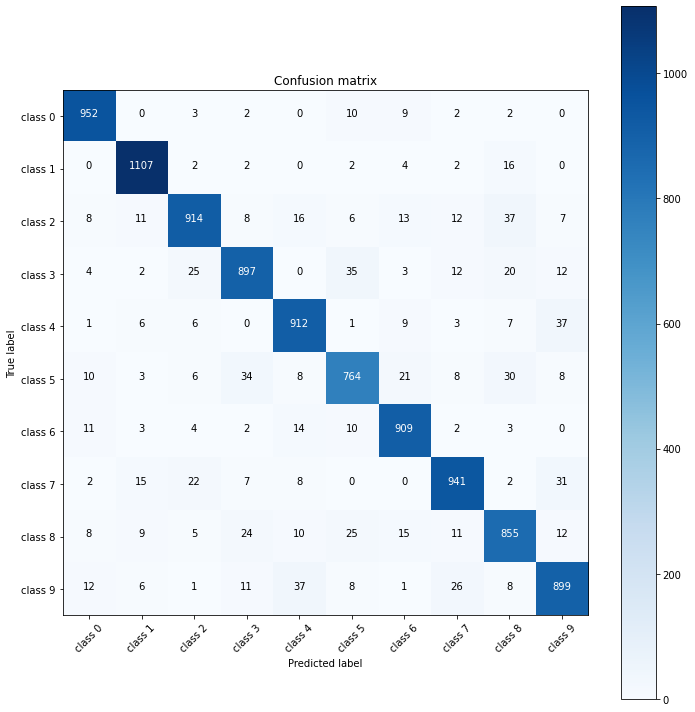

In [35]:
cnf_matrix = (confusion_matrix(np.argmax(ytest,axis=1), y_pred))
np.set_printoptions(precision=2)
plt.figure(figsize=(10,10))
plot_confusion_matrix(cnf_matrix, classes=target_names,
                      title='Confusion matrix')